---
title: "Rename descriptions for PanUKB phenotypes"
author: "Saikat Banerjee"
format:
  html: default
date: "2024-03-27"
file-modified: "2024-03-27"
abstract: "We need short descriptions of the PanUKB phenotypes for plotting"

---

# Setup

In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import re

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils

mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 120)

# Load the traits dataframe

In [2]:
data_dir = "/gpfs/commons/home/sbanerjee/work/npd/PanUKB/data"
trait_df  = pd.read_pickle(os.path.join(data_dir, f"modselect/traits_all.pkl"))
trait_df

,zindex,trait_type,phenocode,pheno_sex,coding,modifier,description,description_more,coding_description,category,BIN_QT,n_cases_EUR,n_controls_EUR,N,Neff,filename,aws_link,estimates.final.h2_observed
0,1,icd10,A04,both_sexes,NaN,NaN,A04 Other bacterial intestinal infections,truncated: true,NaN,Chapter I Certain infectious and parasitic dis...,BIN,3088,417443.0,420531,6130.649032,icd10-A04-both_sexes.tsv.bgz,https://pan-ukb-us-east-1.s3.amazonaws.com/sum...,0.0033
1,2,icd10,A08,both_sexes,NaN,NaN,A08 Viral and other specified intestinal infec...,truncated: true,NaN,Chapter I Certain infectious and parasitic dis...,BIN,1107,419424.0,420531,2208.171897,icd10-A08-both_sexes.tsv.bgz,https://pan-ukb-us-east-1.s3.amazonaws.com/sum...,0.0001
2,3,icd10,A09,both_sexes,NaN,NaN,A09 Diarrhoea and gastro-enteritis of presumed...,truncated: true,NaN,Chapter I Certain infectious and parasitic dis...,BIN,9029,411502.0,420531,17670.286180,icd10-A09-both_sexes.tsv.bgz,https://pan-ukb-us-east-1.s3.amazonaws.com/sum...,0.0035
3,4,icd10,A41,both_sexes,NaN,NaN,A41 Other septicaemia,truncated: true,NaN,Chapter I Certain infectious and parasitic dis...,BIN,5512,415019.0,420531,10879.505810,icd10-A41-both_sexes.tsv.bgz,https://pan-ukb-us-east-1.s3.amazonaws.com/sum...,0.0011
4,5,icd10,B34,both_sexes,NaN,NaN,B34 Viral infection of unspecified site,truncated: true,NaN,Chapter I Certain infectious and parasitic dis...,BIN,2129,418402.0,420531,4236.443249,icd10-B34-both_sexes.tsv.bgz,https://pan-ukb-us-east-1.s3.amazonaws.com/sum...,0.0003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2478,2479,continuous,Smoking,both_sexes,NaN,Ever_Never,"Smoking status, ever vs never",Ever (previous + current smoker) vs never base...,NaN,NaN,QT,418817,NaN,418817,418817.000000,continuous-Smoking-both_sexes-Ever_Never.tsv.bgz,https://pan-ukb-us-east-1.s3.amazonaws.com/sum...,0.1100
2479,2480,continuous,eGFR,both_sexes,NaN,irnt,"Estimated glomerular filtration rate, serum cr...",eGFR based on serum creatinine (30700) using t...,NaN,NaN,QT,401867,NaN,401867,401867.000000,continuous-eGFR-both_sexes-irnt.tsv.bgz,https://pan-ukb-us-east-1.s3.amazonaws.com/sum...,0.2070
2480,2481,continuous,eGFRcreacys,both_sexes,NaN,irnt,"Estimated glomerular filtration rate, cystain C",eGFR based on cystain C (30720) using the CKD-...,NaN,NaN,QT,401570,NaN,401570,401570.000000,continuous-eGFRcreacys-both_sexes-irnt.tsv.bgz,https://pan-ukb-us-east-1.s3.amazonaws.com/sum...,0.2380
2481,2482,continuous,eGFRcys,both_sexes,NaN,irnt,"Estimated glomerular filtration rate, serum cr...",eGFR based on serum creatinine (30700) and cys...,NaN,NaN,QT,402031,NaN,402031,402031.000000,continuous-eGFRcys-both_sexes-irnt.tsv.bgz,https://pan-ukb-us-east-1.s3.amazonaws.com/sum...,0.2240


In [3]:
# Replace Nan entries from phenocode
trait_df['long_description']  = trait_df['description']
trait_df['long_description']  = trait_df['long_description'].fillna(trait_df['phenocode'])
trait_df['short_description'] = trait_df['long_description']
trait_df[trait_df['description'].isnull()]

,zindex,trait_type,phenocode,pheno_sex,coding,modifier,description,description_more,coding_description,category,BIN_QT,n_cases_EUR,n_controls_EUR,N,Neff,filename,aws_link,estimates.final.h2_observed,long_description,short_description
1037,1038,prescriptions,5-alpha reductase inhibitor|BPH|benign prostat...,both_sexes,NaN,NaN,NaN,NaN,NaN,NaN,BIN,3949,416582.0,420531,7823.833763,prescriptions-5-alpha_reductase_inhibitor|BPH|...,https://pan-ukb-us-east-1.s3.amazonaws.com/sum...,0.0078,5-alpha reductase inhibitor|BPH|benign prostat...,5-alpha reductase inhibitor|BPH|benign prostat...
1038,1039,prescriptions,ACE inhibitor|anti-hypertensive,both_sexes,NaN,NaN,NaN,NaN,NaN,NaN,BIN,37950,382581.0,420531,69050.552520,prescriptions-ACE_inhibitor|anti-hypertensive-...,https://pan-ukb-us-east-1.s3.amazonaws.com/sum...,0.0263,ACE inhibitor|anti-hypertensive,ACE inhibitor|anti-hypertensive
1039,1040,prescriptions,Antiviral,both_sexes,NaN,NaN,NaN,NaN,NaN,NaN,BIN,6867,413664.0,420531,13509.732640,prescriptions-Antiviral-both_sexes.tsv.bgz,https://pan-ukb-us-east-1.s3.amazonaws.com/sum...,0.0038,Antiviral,Antiviral
1040,1041,prescriptions,DPP-4 inhibitor|diabetes,both_sexes,NaN,NaN,NaN,NaN,NaN,NaN,BIN,1344,419187.0,420531,2679.409261,prescriptions-DPP-4_inhibitor|diabetes-both_se...,https://pan-ukb-us-east-1.s3.amazonaws.com/sum...,0.0050,DPP-4 inhibitor|diabetes,DPP-4 inhibitor|diabetes
1041,1042,prescriptions,Desogestrel,both_sexes,NaN,NaN,NaN,NaN,NaN,hormone,BIN,1418,419113.0,420531,2826.437214,prescriptions-Desogestrel-both_sexes.tsv.bgz,https://pan-ukb-us-east-1.s3.amazonaws.com/sum...,0.0011,Desogestrel,Desogestrel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,1406,prescriptions,vitamin D derivative|inorganic salt|dietary su...,both_sexes,NaN,NaN,NaN,NaN,NaN,NaN,BIN,4784,415747.0,420531,9459.153537,prescriptions-vitamin_D_derivative|inorganic_s...,https://pan-ukb-us-east-1.s3.amazonaws.com/sum...,NaN,vitamin D derivative|inorganic salt|dietary su...,vitamin D derivative|inorganic salt|dietary su...
1406,1407,prescriptions,warfarin,both_sexes,NaN,NaN,NaN,NaN,NaN,"anti-coagulant,vitamin K epoxide reductase inh...",BIN,6736,413795.0,420531,13256.207600,prescriptions-warfarin-both_sexes.tsv.bgz,https://pan-ukb-us-east-1.s3.amazonaws.com/sum...,NaN,warfarin,warfarin
1407,1408,prescriptions,xanthine oxidase inhibitor|anti-gout agent,both_sexes,NaN,NaN,NaN,NaN,NaN,NaN,BIN,4720,415811.0,420531,9334.046337,prescriptions-xanthine_oxidase_inhibitor|anti-...,https://pan-ukb-us-east-1.s3.amazonaws.com/sum...,NaN,xanthine oxidase inhibitor|anti-gout agent,xanthine oxidase inhibitor|anti-gout agent
1408,1409,prescriptions,zolpidem,both_sexes,NaN,NaN,NaN,NaN,NaN,"GABA agonist,sedative",BIN,1766,418765.0,420531,3517.167533,prescriptions-zolpidem-both_sexes.tsv.bgz,https://pan-ukb-us-east-1.s3.amazonaws.com/sum...,NaN,zolpidem,zolpidem


# Replace coding descriptions

In [4]:
trait_df[~trait_df['coding_description'].isnull()]['description'].unique().tolist()

['Cancer code, self-reported',
 'Non-cancer illness code, self-reported',
 'Treatment/medication code',
 'Illnesses of father',
 'Illnesses of mother']

In [5]:
coding_list = trait_df[~trait_df['coding_description'].isnull()]['description'].unique().tolist()
coding_prefix_long = {
    'Cancer code, self-reported' : 'self-reported',
    'Non-cancer illness code, self-reported' : 'self-reported',
    'Treatment/medication code' : 'medication',
    'Illnesses of father' : '(father illness)',
    'Illnesses of mother': '(mother illness)',
}

coding_prefix_short = {
    'Cancer code, self-reported' : 'self-reported',
    'Non-cancer illness code, self-reported' : 'self-reported',
    'Treatment/medication code' : '',
    'Illnesses of father' : '(father)',
    'Illnesses of mother': '(mother)',
}

for desc in coding_list:
    # Long
    traits = trait_df.loc[trait_df['description'] == desc, 'coding_description'].tolist()
    if len(coding_prefix_long[desc]) > 0:
        traits = [f"{x} {coding_prefix_long[desc]}".strip() for x in traits]
    trait_df.loc[trait_df['description'] == desc, 'long_description'] = traits
    
    # Short 
    traits = trait_df.loc[trait_df['description'] == desc, 'coding_description'].tolist()
    if len(coding_prefix_short[desc]) > 0:
        traits = [f"{x} {coding_prefix_short[desc]}".strip() for x in traits]
    trait_df.loc[trait_df['description'] == desc, 'short_description'] = traits
    
# # Show results
# trait_df[~trait_df['coding_description'].isnull()]['short_description'].tolist()

# Shorten trait names

I use short names from FactorGO and OpenAI. Manually curated in a python dictionary `shorten_traits_map`.

In [6]:
# Use shortened trait names from FactorGO.

shorten_traits_map = {
    "COVID-19 positive (controls include untested), only patients from centers in England:4" :  "COVID-19 positive_4 (England)",
    "COVID-19 positive (controls include untested):4" :   "COVID-19 positive_4",
    "COVID-19 positive (controls include untested), only patients from centers in England:3" :  "COVID-19 positive_3 (England)",
    "COVID-19 positive (controls include untested):3" :  "COVID-19 positive_3",
    "COVID-19 positive (controls only COVID-19 negative):4" :  "COVID-19 positive vs negative_4",
    "COVID-19 positive (controls only COVID-19 negative):3" :  "COVID-19 positive vs negative_3",

    "L57 Skin changes due to chronic exposure to nonionising radiation" :  "L57 Skin changes due to radiation",
    "Toxic effect of (non-ethyl) alcohol and petroleum and other solvents" :  "Toxic effect of non-ethanol solvents",
    "Malignant neoplasm of other and ill-defined sites within the digestive organs and peritoneum" :  "Digestive system malignant neoplasm",

    "Forced vital capacity (FVC)" :  "FVC",
    "Forced expiratory volume in 1-second (FEV1)" :  "FEV1",
    "Forced expiratory volume in 1-second (FEV1), Best measure" :  "FEV1 (best)",
    "Forced expiratory volume in 1-second (FEV1), predicted" :  "FEV1 (predict)",
    "Forced vital capacity (FVC), Best measure" :  "FVC (best)",

    "Osteoporosis, osteopenia and pathological fracture" :  "Osteoporosis, osteopenia and others",
    "X61 Intentional self-poisoning by and exposure to antiepileptic, sedative-hypnotic, anti-Parkinsonism and psychotropic drugs, not elsewhere classified" :  "X61 Intentional self-poisoning by drugs",
    "M81 Osteoporosis without pathological fracture" :  "M81 Osteoporosis without fracture",
    "Inflammatory bowel disease and other gastroenteritis and colitis" :  "IBD, other gastroenteritis and colitis",
    "T43 Poisoning by psychotropic drugs, not elsewhere classified" :  "T43 Poisoning by psychotropic drugs",
    "folic acid supplement|Food Supplement" :  "folic acid supplement",
    "X60 Intentional self-poisoning by and exposure to nonopioid analgesics, antipyretics and antirheumatics" :  "X60 Intentional self-poisoning",
    "T39 Poisoning by nonopioid analgesics, antipyretics and antirheumatics" :  "T39 Poisoning by drugs",
    "N32 Other disorders of bladder" :  "N32 Other bladder disorders",

    "Systolic blood pressure, automated reading, adjusted by medication" :  "SBP (auto_medadj)",
    "Mean arterial pressure, automated reading, adjusted by medication" :  "Mean arterial pressure (auto_medadj)",
    "Systolic blood pressure, combined automated + manual reading, adjusted by medication" :  "SBP (combined_medadj)",
    "Mean arterial pressure, combined automated + manual reading, adjusted by medication" :  "Mean arterial pressure (combined_medadj)",
    "Systolic blood pressure, automated reading" :  "SBP (auto)",
    "Diastolic blood pressure, automated reading, adjusted by medication" :  "DBP (auto_medadj)",
    "Pulse pressure, automated reading, adjusted by medication" :  "Pulse pressure (auto_medadj)",
    "Mean arterial pressure, automated reading" :  "Mean arterial pressure (auto)",
    "Systolic blood pressure, combined automated + manual reading" :  "SBP (combined)",
    "Pulse pressure, adjusted by medication" :  "Pulse pressure (medadj)",
    "Diastolic blood pressure, combined automated + manual reading, adjusted by medication" :  "DBP (combined_medadj)",
    "Pulse pressure, automated reading" :  "Pulse pressure (auto)",
    "Mean arterial pressure, combined automated + manual reading" :  "Mean arterial pressure (combined)",
    "Pulse pressure, combined automated + manual reading" :  "Pulse pressure (combined)",
    "Pulse pressure, combined automated + manual reading, adjusted by medication" :  "Pulse pressure (combined_medadj)",

    "G55 Nerve root and plexus compressions in diseases classified elsewhere" :  "G55 Nerve root and plexus compressions",
    "E87 Other disorders of fluid, electrolyte and acid-base balance" :  "E87 Other disorders of fluid*",
    "O32 Maternal care for known or suspected malpresentation of foetus" :  "O32 malpresentation of foetus",
    "Rheumatoid arthritis and other inflammatory polyarthropathies" :  "RA, other inflammatory polyarthropathies",

    "Treatment/medication code:levothyroxine sodium" :  "levothyroxine sodium (med)",
    "Home location - north co-ordinate (rounded)" :  "Home location - north",
    "Home location at assessment - north co-ordinate (rounded)" :  "Home location at assessment - north",
    "Home location - east co-ordinate (rounded)" :  "Home location - east",
    "Home location at assessment - east co-ordinate (rounded)" :  "Home location at assessment - east",

    "Heel bone mineral density (BMD)" :  "Heel BMD",
    "Heel bone mineral density (BMD) T-score, automated" :  "Heel BMD T-score (auto)",
    "Heel quantitative ultrasound index (QUI), direct entry" :  "Heel QUI (direct entry)",
    "Heel Broadband ultrasound attenuation, direct entry" :  "Heel BUA (direct entry)",
    "Heel bone mineral density (BMD) (right)" :  "Heel BMD (right)",
    "Heel bone mineral density (BMD) T-score, automated (right)" :  "Heel BMD T-score (auto,right)",
    "Heel quantitative ultrasound index (QUI), direct entry (right)" :  "Heel QUI (direct entry,right)",
    "Heel bone mineral density (BMD) T-score, automated (left)" :  "Heel BMD T-score (auto,left)",
    "Heel quantitative ultrasound index (QUI), direct entry (left)" :  "Heel QUI (direct,left)",
    "Heel bone mineral density (BMD) (left)" :  "Heel BMD (left)",
    "Heel broadband ultrasound attenuation (right)" :  "Heel BUA (right)",
    "Heel broadband ultrasound attenuation (left)" :  "Heel BUA (left)",

    "Average night-time sound level of noise pollution" :  "Average night-time noise pollution",
    "Average daytime sound level of noise pollution" :  "Average daytime noise pollution",
    "Average 16-hour sound level of noise pollution" :  "Average 16-hour noise pollution",
    "Average 24-hour sound level of noise pollution" :  "Average 24-hour noise pollution",
    "Average evening sound level of noise pollution" :  "Average evening noise pollution",
    "Contracture of palmar fascia [Dupuytren's disease]" :  "Dupuytren's disease",
}

# Manual addition
shorten_traits_map.update({
    "Pulse pressure, manual reading" : "Pulse pressure (manual)",
    "Mean arterial pressure, manual reading" : "Mean arterial pressure (manual)",
    "Systolic blood pressure, manual reading" : "SBP (manual)",
    "Diastolic blood pressure, manual reading" : "DBP (manual)",
})

# Use OpenAI assisted short trait names.

shorten_traits_map_openai = {
    "A04 Other bacterial intestinal infections":
        "A04 Bacterial intestinal infections",
    "A08 Viral and other specified intestinal infections":
        "A08 Viral, other intestinal infections",
    "A09 Diarrhoea and gastro-enteritis of presumed infectious origin":
        "A09 Diarrhoea, infectious gastro-enteritis",
    "B95 Streptococcus and staphylococcus as the cause of diseases classified to other chapters":
        "B95 Streptococcus, staphylococcus",
    "B96 Other bacterial agents as the cause of diseases classified to other chapters":
        "B96 Other bacterial agents",
    "B98 Other specified infectious agents as the cause of diseases classified to other chapters":
        "B98 Other infectious agents",
    "C34 Malignant neoplasm of bronchus and lung":
        "C34 Malignant neoplasm bronchus and lung",
    "C77 Secondary and unspecified malignant neoplasm of lymph nodes":
        "C77 Second malignant neoplasm lymph nodes",
    "C78 Secondary malignant neoplasm of respiratory and digestive organs":
        "C78 Second malignant neoplasm respiratory and digestive organs",
    "C79 Secondary malignant neoplasm of other sites":
        "C79 Second malignant neoplasm other sites",
    "C80 Malignant neoplasm without specification of site":
        "C80 Malignant neoplasm no site specified",
    "C85 Other and unspecified types of non-Hodgkin's lymphoma":
        "C85 Other types of non-Hodgkin lymphoma",
    "D12 Benign neoplasm of colon, rectum, anus and anal canal":
        "D12 Benign neoplasm gastrointestine",
    "D13 Benign neoplasm of other and ill-defined parts of digestive system":
        "D13 Benign neoplasm digestive system",
    "D18 Haemangioma and lymphangioma, any site":
        "D18 Haemangioma and lymphangioma",
    "D35 Benign neoplasm of other and unspecified endocrine glands":
        "D35 Benign neoplasm endocrine glands",
    "D37 Neoplasm of uncertain or unknown behaviour of oral cavity and digestive organs":
        "D37 Neoplasm oral cavity and digestive organs",
    "D69 Purpura and other haemorrhagic conditions":
        "D69 Purpura, other haemorrhagic conditions",
    "E11 Non-insulin-dependent diabetes mellitus":
        "E11 Non-insulin-dependent diabetes mellitus",
    "E16 Other disorders of pancreatic internal secretion":
        "E16 Disorders of pancreatic internal secretion",
    "E21 Hyperparathyroidism and other disorders of parathyroid gland":
        "E21 Disorders of parathyroid gland",
    "E78 Disorders of lipoprotein metabolism and other lipidaemias":
        "E78 Lipidaemias, lipoprotein metabolism",
    "E89 Postprocedural endocrine and metabolic disorders, not elsewhere classified":
        "E89 Postprocedural endocrine and metabolic disorders",
    "F05 Delirium, not induced by alcohol and other psychoactive substances":
        "F05 Delirium, no substance abuse",
    "F10 Mental and behavioural disorders due to use of alcohol":
        "F10 Mental and behavioural disorders, alcohol use",
    "F17 Mental and behavioural disorders due to use of tobacco":
        "F17 Mental and behavioural disorders, tobacco use",
    "G45 Transient cerebral ischaemic attacks and related syndromes":
        "G45 Transient cerebral ischaemic attacks",
    "G99 Other disorders of nervous system in diseases classified elsewhere":
        "G99 Other disorders of nervous system",
    "H36 Retinal disorders in diseases classified elsewhere":
        "H36 Retinal disorders",
    "H52 Disorders of refraction and accommodation":
        "H52 Disorders of refraction and accommodation",
    "H90 Conductive and sensorineural hearing loss":
        "H90 Conductive and sensorineural hearing loss",
    "I44 Atrioventricular and left bundle-branch block":
        "I44 Atrioventricular and left bundle-branch block",
    "I51 Complications and ill-defined descriptions of heart disease":
        "I51 Complications of heart disease",
    "I65 Occlusion and stenosis of precerebral arteries, not resulting in cerebral infarction":
        "I65 Occlusion and stenosis of precerebral arteries",
    "I77 Other disorders of arteries and arterioles":
        "I77 Disorders of arteries and arterioles",
    "J31 Chronic rhinitis, nasopharyngitis and pharyngitis":
        "J31 Chronic rhinitis, nasopharyngitis, pharyngitis",
    "J34 Other disorders of nose and nasal sinuses":
        "J34 Disorders of nose and nasal sinuses",
    "J35 Chronic diseases of tonsils and adenoids":
        "J35 Chronic tonsils and adenoids",
    "J38 Diseases of vocal cords and larynx, not elsewhere classified":
        "J38 Diseases of vocal cords and larynx",
    "J44 Other chronic obstructive pulmonary disease":
        "J44 Chronic obstructive pulmonary disease",
    "J84 Other interstitial pulmonary diseases":
        "J84 Interstitial pulmonary diseases",
    "J96 Respiratory failure, not elsewhere classified":
        "J96 Respiratory failure",
    "K04 Diseases of pulp and periapical tissues":
        "K04 Diseases of pulp and periapical tissues",
    "K08 Other disorders of teeth and supporting structures":
        "K08 Disorders of teeth",
    "K13 Other diseases of lip and oral mucosa":
        "K13 Diseases of lip and oral mucosa",
    "K31 Other diseases of stomach and duodenum":
        "K31 Diseases of stomach and duodenum",
    "K52 Other non-infective gastro-enteritis and colitis":
        "K52 Non-infectious gastro-enteritis and colitis",
    "K56 Paralytic ileus and intestinal obstruction without hernia":
        "K56 Paralytic ileus, intestinal obstruction",
    "K59 Other functional intestinal disorders":
        "K59 Functional intestinal disorders",
    "K60 Fissure and fistula of anal and rectal regions":
        "K60 Fissure, fistula of anal, rectal",
    "K64 Haemorrhoids and perianal venous thrombosis":
        "K64 Haemorrhoids, perianal venous thrombosis",
    "K91 Postprocedural disorders of digestive system, not elsewhere classified":
        "K91 Postprocedural disorders digestive system",
    "L02 Cutaneous abscess, furuncle and carbuncle":
        "L02 Cutaneous abscess, furuncle, carbuncle",
    "L08 Other local infections of skin and subcutaneous tissue":
        "L08 Local infections skin, subcutaneous tissue",
    "L72 Follicular cysts of skin and subcutaneous tissue":
        "L72 Follicular cysts skin, subcutaneous tissue",
    "L98 Other disorders of skin and subcutaneous tissue, not elsewhere classified":
        "L98 Disorders of skin, subcutaneous tissue",
    "M18 Arthrosis of first carpometacarpal joint":
        "M18 Arthrosis first carpometacarpal joint",
    "M20 Acquired deformities of fingers and toes":
        "M20 Acquired deformities fingers and toes",
    "M25 Other joint disorders, not elsewhere classified":
        "M25 Other joint disorders",
    "M35 Other systemic involvement of connective tissue":
        "M35 Systemic involvement of connective tissue",
    "M67 Other disorders of synovium and tendon":
        "M67 Disorders of synovium and tendon",
    "M70 Soft tissue disorders related to use, overuse and pressure":
        "M70 Soft tissue disorders related to overuse",
    "M79 Other soft tissue disorders, not elsewhere classified":
        "M79 Other soft tissue disorders",
    "N28 Other disorders of kidney and ureter, not elsewhere classified":
        "N28 Other disorders of kidney and ureter",
    "N31 Neuromuscular dysfunction of bladder, not elsewhere classified":
        "N31 Neuromuscular dysfunction of bladder",
    "N50 Other disorders of male genital organs":
        "N50 Disorders male genital organs",
    "N73 Other female pelvic inflammatory diseases":
        "N73 Female pelvic inflammatory diseases",
    "N83 Noninflammatory disorders of ovary, Fallopian tube and broad ligament":
        "N83 Noninflam. disorders ovary, Fallopian tube, broad ligament",
    "N85 Other noninflammatory disorders of uterus, except cervix":
        "N85 Noninflam. disorders uterus, except cervix",
    "N88 Other noninflammatory disorders of cervix uteri":
        "N88 Noninflam. disorders cervix uteri",
    "N89 Other noninflammatory disorders of vagina":
        "N89 Other noninflam. disorders vagina",
    "N90 Other noninflammatory disorders of vulva and perineum":
        "N90 Noninflam. disorders vulva, perineum",
    "N92 Excessive, frequent and irregular menstruation":
        "N92 Excessive, frequent, irregular menstruation",
    "N93 Other abnormal uterine and vaginal bleeding":
        "N93 Abnormal uterine, vaginal bleeding",
    "N94 Pain and other conditions associated with female genital organs and menstrual cycle":
        "N94 Female genital organs, menstrual cycle",
    "N95 Menopausal and other perimenopausal disorders":
        "N95 Menopausal, perimenopausal disorders",
    "N99 Postprocedural disorders of genito-urinary system, not elsewhere classified":
        "N99 Postprocedural disorders of genito-urinary system",
    "O02 Other abnormal products of conception":
        "O02 Abnormal products of conception",
    "O26 Maternal care for other conditions predominantly related to pregnancy":
        "O26 Maternal care - pregnancy",
    "O34 Maternal care for known or suspected abnormality of pelvic organs":
        "O34 Maternal care - abnormality of pelvic organs",
    "O36 Maternal care for other known or suspected foetal problems":
        "O36 Maternal care - foetal problems",
    "O68 Labour and delivery complicated by foetal stress [distress]":
        "O68 Labour, delivery complicated by foetal stress",
    "O99 Other maternal diseases classifiable elsewhere but complicating pregnancy, childbirth and the puerperium":
        "O99 Complications in pregnancy, childbirth, puerperium",
    "R01 Cardiac murmurs and other cardiac sounds":
        "R01 Cardiac murmurs, sounds",
    "R03 Abnormal blood-pressure reading, without diagnosis":
        "R03 Abnormal BP, no diagnosis",
    "R04 Haemorrhage from respiratory passages":
        "R04 Haemorrhage respiratory passages",
    "R09 Other symptoms and signs involving the circulatory and respiratory systems":
        "R09 Other symptoms circulatory, respiratory systems",
    "R19 Other symptoms and signs involving the digestive system and abdomen":
        "R19 Other symptoms digestive system and abdomen",
    "R22 Localised swelling, mass and lump of skin and subcutaneous tissue":
        "R22 Swelling, mass, lump skin and subcutaneous",
    "R29 Other symptoms and signs involving the nervous and musculoskeletal systems":
        "R29 Other symptoms nervous, musculoskeletal systems",
    "R39 Other symptoms and signs involving the urinary system":
        "R39 Other symptoms urinary system",
    "R41 Other symptoms and signs involving cognitive functions and awareness":
        "R41 Other symptoms cognitive func",
    "R45 Symptoms and signs involving emotional state":
        "R45 Symptoms emotional state",
    "R47 Speech disturbances, not elsewhere classified":
        "R47 Speech disturbances",
    "R56 Convulsions, not elsewhere classified":
        "R56 Convulsions",
    "R63 Symptoms and signs concerning food and fluid intake":
        "R63 Symptoms food and fluid intake",
    "R79 Other abnormal findings of blood chemistry":
        "R79 Abnormal findings blood chemistry",
    "R87 Abnormal findings in specimens from female genital organs":
        "R87 Abnormal findings female genital organs",
    "R93 Abnormal findings on diagnostic imaging of other body structures":
        "R93 Abnormal findings on imaging",
    "S09 Other and unspecified injuries of head":
        "S09 Other head injuriesd",
    "S66 Injury of muscle and tendon at wrist and hand level":
        "S66 Injury of muscle, tendon at wrist, hand",
    "S82 Fracture of lower leg, including ankle":
        "S82 Fracture of lower leg",
    "T42 Poisoning by antiepileptic, sedative-hypnotic and anti-Parkinsonism drugs":
        "T42 Poisoning by drugs",
    "T78 Adverse effects, not elsewhere classified":
        "T78 Adverse effects",
    "T81 Complications of procedures, not elsewhere classified":
        "T81 Complications of procedures",
    "T82 Complications of cardiac and vascular prosthetic devices, implants and grafts":
        "T82 Complications of cardiac, vascular prosthesis",
    "T83 Complications of genito-urinary prosthetic devices, implants and grafts":
        "T83 Complications of genito-urinary prosthesis",
    "T84 Complications of internal orthopaedic prosthetic devices, implants and grafts":
        "T84 Complications of internal prosthesis",
    "T85 Complications of other internal prosthetic devices, implants and grafts":
        "T85 Complications of other internal prosthesis",
    "V18 Pedal cyclist injured in noncollision transport accident":
        "V18 Pedal cyclist accident injury",
    "W00 Fall on same level involving ice and snow":
        "W00 Fall due to ice and snow",
    "W01 Fall on same level from slipping, tripping and stumbling":
        "W01 Fall due to slipping, tripping, stumbling",
    "X50 Overexertion and strenuous or repetitive movements":
        "X50 Overexertion",
    "Y42 Hormones and their synthetic substitutes and antagonists, not elsewhere classified":
        "Y42 Hormone substitutes, antagonists",
    "Y45 Analgesics, antipyretics and anti-inflammatory drugs":
        "Y45 Analgesics, antipyretics, anti-inflammatory drugs",
    "Y83 Surgical operation and other surgical procedures as the cause of abnormal reaction of the patient, or of later complication, without mention of misadventure at the time of the procedure":
        "Y83 Surgery complications",
    "Y84 Other medical procedures as the cause of abnormal reaction of the patient, or of later complication, without mention of misadventure at the time of the procedure":
        "Y84 Medical procedure complications",
    "Z01 Other special examinations and investigations of persons without complaint or reported diagnosis":
        "Z01 Examination without complaints",
    "Z02 Examination and encounter for administrative purposes":
        "Z02 Examination administrative purposes",
    "Z03 Medical observation and evaluation for suspected diseases and conditions":
        "Z03 Medical observation for suspected diseases",
    "Z04 Examination and observation for other reasons":
        "Z04 Examination for other reasons",
    "Z08 Follow-up examination after treatment for malignant neoplasm":
        "Z08 Follow-up after malignant neoplasm",
    "Z09 Follow-up examination after treatment for conditions other than malignant neoplasms":
        "Z09 Follow-up after non-malignant cases",
    "Z12 Special screening examination for neoplasms":
        "Z12 Examination for neoplasms",
    "Z13 Special screening examination for other diseases and disorders":
        "Z13 Examination for other diseases",
    "Z42 Follow-up care involving plastic surgery":
        "Z42 Follow-up after plastic surgery",
    "Z45 Adjustment and management of implanted device":
        "Z45 Management of implanted device",
    "Z46 Fitting and adjustment of other devices":
        "Z46 Management of other devices",
    "Z50 Care involving use of rehabilitation procedures":
        "Z50 Care using rehabilitation procedures",
    "Z53 Persons encountering health services for specifie procedures, not carried out":
        "Z53 Health services for procedures, not carried out",
    "Z60 Problems related to social environment":
        "Z60 Problems related to social environment",
    "Z71 Persons encountering health services for other counselling and medical advice, not elsewhere classified":
        "Z71 Counselling and medical advice",
    "Z75 Problems related to medical facilities and other health care":
        "Z75 Problems related to medical facilities",
    "Z82 Family history of certain disabilities and chronic diseases leading to disablement":
        "Z82 Family history of chronic diseases",
    "Z83 Family history of other specific disorders":
        "Z83 Family history of specific disorders",
    "Z85 Personal history of malignant neoplasm":
        "Z85 Personal history of malignant neoplasm",
    "Z86 Personal history of certain other diseases":
        "Z86 Personal history of certain diseases",
    "Z87 Personal history of other diseases and conditions":
        "Z87 Personal history of other diseases",
    "Z88 Personal history of allergy to drugs, medicaments and biologocal substances":
        "Z88 Personal history of allergy to medication",
    "Z90 Acquired absence of organs, not elsewhere classified":
        "Z90 Acquired absence of organs",
    "Z91 Personal history of risk-factors, not elsewhere classified":
        "Z91 Personal history of risk-factors",
    "Z92 Personal history of medical treatment":
        "Z92 Personal history of medical treatment",
    "Z95 Presence of cardiac and vascular implants and grafts":
        "Z95 Cardiac and vascular prosthesis",
    "Z96 Presence of other functional implants":
        "Z96 Other functional implants",
    "Z99 Dependence on enabling machines and devices, not elsewhere classified":
        "Z99 Dependence on medical devices",
    "Infection/inflammation of internal prosthetic device; implant; and graft":
        "Inflammation of internal prosthesis",
    "Symptoms concerning nutrition, metabolism, and development":
        "Symptoms nutr, metab, dev issues",
    "Complications of surgical and medical procedures":
        "Complications of med procedures",
    "Other ill-defined and unknown causes of morbidity and mortality":
        "Unknown causes of morbidity, mortality",
    "Malignant neoplasm of rectum, rectosigmoid junction, and anus":
        "Malignant neoplasm rectum, anus",
    "Neoplasm of unspecified nature of digestive system":
        "Neoplasm digestive system",
    "Cervical intraepithelial neoplasia [CIN] [Cervical dysplasia]":
        "Cervical dysplasia",
    "Malignant neoplasm of ovary and other uterine adnexa":
        "Malignant neoplasm ovary, uterine adnexa",
    "Cancer of urinary organs (incl. kidney and bladder)":
        "Cancer of urinary organs",
    "Malignant neoplasm of kidney, except pelvis":
        "Malignant neoplasm kidney, exc pelvis",
    "Secondary malignancy of respiratory organs":
        "Secondary malignancy respiratory organs",
    "Secondary malignant neoplasm of digestive systems":
        "Secondary malignant neoplasm digestive systems",
    "Cancer of other lymphoid, histiocytic tissue":
        "Cancer lymphoid, histiocytic tissue",
    "Benign neoplasm of lip, oral cavity, and pharynx":
        "Benign neoplasm lip, oral, pharynx",
    "Benign neoplasm of other parts of digestive system":
        "Benign neoplasm other digestive sys",
    "Other benign neoplasm of connective and other soft tissue":
        "Benign neoplasm connective tissue",
    "Benign neoplasm of other endocrine glands and related structures":
        "Benign neoplasm endocrine glands",
    "Type 2 diabetes with ophthalmic manifestations":
        "Type 2 diabetes with eye issues",
    "Other disorders of pancreatic internal secretion":
        "Other disorders pancreatic secretion",
    "Disorders of calcium/phosphorus metabolism":
        "Disorders of Ca/P metabolism",
    "Disorders of fluid, electrolyte, and acid-base balance":
        "Fluid, electrolyte, acid-base issues",
    "Overweight, obesity and other hyperalimentation":
        "Overweight, obesity hyperalimentation",
    "Iron deficiency anemias, unspecified or not due to blood loss":
        "Iron deficiency anemias, unspecified",
    "Other diseases of blood and blood-forming organs":
        "Other diseases blood-forming organs",
    "Delirium dementia and amnestic and other cognitive disorders":
        "Delirium, dementia, cognitive disorders",
    "Delirium due to conditions classified elsewhere":
        "Delirium due to other conditions",
    "Other specified nonpsychotic and/or transient mental disorders":
        "Other nonpsychotic, transient mental disorders",
    "Swelling, mass, or lump in head and neck [Space-occupying lesion, intracranial NOS]":
        "Swelling, mass, lump head / neck",
    "Schizophrenia and other psychotic disorders":
        "Schizophrenia, psychotic disorders",
    "Agorophobia, social phobia, and panic disorder":
        "Agorophobia, social, panic disorder",
    "Extrapyramidal disease and abnormal movement disorders":
        "Extrapyramidal, movement disorders",
    "Epilepsy, recurrent seizures, convulsions":
        "Epilepsy, seizures, convulsions",
    "Degeneration of macula and posterior pole of retina":
        "Macula, retina degeneration",
    "Macular degeneration (senile) of retina NOS":
        "Macular degeneration (senile) NOS",
    "Retinal vascular changes and abnomalities":
        "Retinal vascular changes",
    "Disorders of refraction and accommodation; blindness and low vision":
        "Refraction, blindness, low vision",
    "Strabismus and other disorders of binocular eye movements":
        "Strabismus, binocular eye movements",
    "Otitis media and Eustachian tube disorders":
        "Otitis media, Eustachian tube disorders",
    "Vertiginous syndromes and other disorders of vestibular system":
        "Vertiginous syndromes",
    "Dizziness and giddiness (Light-headedness and vertigo)":
        "Dizziness, giddiness (vertigo)",
    "Elevated blood pressure reading without diagnosis of hypertension":
        "Elevated BP w/o hypertension",
    "Unstable angina (intermediate coronary syndrome)":
        "Unstable angina",
    "Other chronic ischemic heart disease, unspecified":
        "Other chronic ischemic heart disease",
    "Other acute and subacute forms of ischemic heart disease":
        "Other acute/subacute ischemic heart disease",
    "Cardiac arrest and ventricular fibrillation":
        "Cardiac arrest, ventricular fibrillation",
    "Congestive heart failure; nonhypertensive":
        "Congestive heart failure, nonhypertensive",
    "Ill-defined descriptions and complications of heart disease":
        "Ill-defined heart disease complications",
    "Occlusion and stenosis of precerebral arteries":
        "Occlusion, stenosis precerebral arteries",
    "Cerebral artery occlusion, with cerebral infarction":
        "Cerebral artery occlusion, infarction",
    "Polyarteritis nodosa and allied conditions":
        "Polyarteritis nodosa",
    "Other disorders of arteries and arterioles":
        "Other disorders arteries, arterioles",
    "Noninfectious disorders of lymphatic channels":
        "Noninfectious disorders lymphatic channels",
    "Phlebitis and thrombophlebitis of lower extremities":
        "Phlebitis, thrombophlebitis lower extremities",
    "Acute upper respiratory infections of multiple or unspecified sites":
        "Acute upper respiratory infections",
    "Pulmonary collapse; interstitial and compensatory emphysema":
        "Pulmonary collapse, emphysema",
    "Respiratory failure, insufficiency, arrest":
        "Respiratory failure, insufficiency",
    "Other diseases of respiratory system, not elsewhere classified":
        "Other diseases resp sys, unclassified",
    "Other diseases of respiratory system, NEC":
        "Other diseases resp sys, NEC",
    "Other diseases of the teeth and supporting structures":
        "Other diseases teeth, supporting structures",
    "Diseases of the oral soft tissues, excluding lesions specific for gingiva and tongue":
        "Diseases oral soft tissues, excl. gingiva, tongue",
    "Diseases and other conditions of the tongue":
        "Diseases of the tongue",
    "Intestinal obstruction without mention of hernia":
        "Intestinal obstruction w/o hernia",
    "Abnormal findings on exam of gastrointestinal tract/ abdominal area":
        "Abnormal GI tract/ abdominal exam",
    "Personal history of diseases of digestive system":
        "Personal history of digestive system diseases",
    "Peritonitis and retroperitoneal infections":
        "Peritonitis, retroperitoneal infections",
    "Peritoneal adhesions (postoperative) (postinfection)":
        "Peritoneal adhesions (postop)",
    "Liver abscess and sequelae of chronic liver disease":
        "Liver abscess, chronic sequelae",
    "Abnormal results of function study of liver":
        "Abnormal liver function study",
    "Other symptoms involving abdomen and pelvis":
        "Other symptoms abdomen, pelvis",
    "Nonspecific abnormal findings in stool contents":
        "Nonspecific stool content abnormalities",
    "Other disorders of the kidney and ureters":
        "Other disorders kidney, ureters",
    "Other disorders of urethra and urinary tract":
        "Other disorders urethra, urinary tract",
    "Urethral stricture (not specified as infectious)":
        "Urethral stricture (non-infectious)",
    "Abnormal findings on examination of urine":
        "Abnormal urine exam",
    "Other symptoms/disorders or the urinary system":
        "Other symptoms urinary system",
    "Other specified benign mammary dysplasias":
        "Other benign mammary dysplasias",
    "Abnormal findings on mammogram or breast exam":
        "Abnormal mammogram",
    "Breast conditions, congenital or relating to hormones":
        "Breast conditions, congenital/hormonal",
    "Inflammatory diseases of female pelvic organs":
        "Inflam. diseases female pelvic organs",
    "Pelvic peritoneal adhesions, female (postoperative) (postinfection)":
        "Pelvic peritoneal adhesions, female (postop)",
    "Inflammatory disease of cervix, vagina, and vulva":
        "Inflam. disease cervix, vagina, vulva",
    "Noninflammatory disorders of ovary, fallopian tube, and broad ligament":
        "Noninflam. disorders ovary, fallopian tube, broad ligament",
    "Noninflammatory disorders of vulva and perineum":
        "Noninflam. disorders vulva, perineum",
    "Pain and other symptoms associated with female genital organs":
        "Pain, symptoms female genital organs",
    "Disorders of menstruation and other abnormal bleeding from female genital tract":
        "Abnormal menstruation, genital bleeding",
    "Hemorrhage during pregnancy; childbirth and postpartum":
        "Pregnancy hemorrhage, postpartum",
    "Early or threatened labor; hemorrhage in early pregnancy":
        "Early/threatened labor, pregnancy hemorrhage",
    "Hypertension complicating pregnancy, childbirth, and the puerperium":
        "Hypertension complications pregnancy",
    "Malposition and malpresentation of fetus or obstruction":
        "Fetus malposition, malpresentation, obstruction",
    "Problems associated with amniotic cavity and membranes":
        "Problems with amniotic cavity, membranes",
    "Abnormality of organs and soft tissues of pelvis complicating pregnancy, childbirth, or the puerperium":
        "Abnormality pelvic organs, soft tissues in pregnancy",
    "Known or suspected fetal abnormality affecting management of mother":
        "Known/suspected fetal abnormality in mother",
    "Fetal distress and abnormal forces of labor":
        "Fetal distress, abnormal labor",
    "Other local infections of skin and subcutaneous tissue":
        "Other infections skin, subcutaneous tissue",
    "Localized superficial swelling, mass, or lump":
        "Localized skin swelling, mass, lump",
    "Disorder of skin and subcutaneous tissue NOS":
        "Disorder skin, subcutaneous tissue NOS",
    "Other hypertrophic and atrophic conditions of skin":
        "Other hypertrophic, atrophic conditions skin",
    "Degenerative skin conditions and other dermatoses":
        "Degenerative skin conditions, dermatoses",
    "Peripheral enthesopathies and allied syndromes":
        "Peripheral enthesopathies, allied syndromes",
    "Other disorders of synovium, tendon, and bursa":
        "Other disorders synovium, tendon, bursa",
    "Ganglion and cyst of synovium, tendon, and bursa":
        "Ganglion, cyst of synovium, tendon, bursa",
    "Disorders of muscle, ligament, and fascia":
        "Disorders muscle, ligament, and fascia",
    "Cardiac and circulatory congenital anomalies":
        "Cardiac, circulatory congenital anomalies",
    "Musculoskeletal symptoms referable to limbs":
        "Musculoskeletal symptoms limbs",
    "Symptoms involving nervous and musculoskeletal systems":
        "Symptoms nervous, musculoskeletal systems",
    "Fracture of vertebral column without mention of spinal cord injury":
        "Vertebral column fracture, no spinal cord injury",
    "Skull and face fracture and other intercranial injury":
        "Skull, face fracture, intercranial injury",
    "Hemorrhage or hematoma complicating a procedure":
        "Hemorrhage, hematoma complicating procedure",
    "Complications of transplants and reattached limbs":
        "Complications transplants, reattached limbs",
    "Complications of cardiac/vascular device, implant, and graft":
        "Complications cardiac/vascular prosthesis",
    "Mechanical complication of unspecified genitourinary device, implant, and graft":
        "Mechanical complication genitourinary prosthetics",
    "Complication of internal orthopedic device":
        "Complication internal orthopedic device",
    "Complication due to other implant and internal device":
        "Complication other implant, internal device",
    "Open wound or laceration of eye or eyelid":
        "Open wound, laceration eye, eyelid",
    "Superficial injury without mention of infection":
        "Superficial injury, no infection",
    "Chronic dermatitis due to solar radiation":
        "Chronic dermatitis from solar radiation",
    "Atopic/contact dermatitis due to other or unspecified":
        "Atopic/contact dermatitis, unspecified",
    "Poisoning by analgesics, antipyretics, and antirheumatics":
        "Poisoning by analgesics, antipyretics, antirheumatics",
    "Opiates and related narcotics causing adverse effects in therapeutic use":
        "Therapeutic opiates adverse effects",
    "Poisoning by agents primarily affecting the cardiovascular system":
        "Poisoning by cardiovascular agents",
    "5-alpha reductase inhibitor|BPH|benign prostatic hyperplasia":
        "5-alpha reductase inhibitor (BPH)",
    "H1-receptor agonist|anti-vertigo agent|antihistamine":
        "H1-receptor agonist (anti-vertigo, antihistamine)",
    "NSAID|non-steroidal anti-inflammatory drug":
        "NSAID",
    "P2Y12 anti-platelet agent|adenosine re-uptake inhibitor|anti-platelet":
        "P2Y12 anti-platelet agent",
    "PDE5 inhibitor|pulmonary hypertension|erectile dysfunction":
        "PDE5 inhibitor (erectile dysfunction)",
    "SSRI|selective serotonin re-uptake inhibitor":
        "SSRI / anti-depressant",
    "abortive anti-migraine agent|selective serotonin receptor agonist|migraine":
        "Abortive anti-migraine agent",
    "aldosterone antagonist|potassium-sparing diuretic|anti-hypertensive":
        "Aldosterone antagonist, diuretic",
    "aminoglycoside antibiotic|corticosteroid|antibiotic":
        "Aminoglycoside antibiotic (corticosteroid)",
    "aminoglycoside antibiotic|dihydrofolate reductase inhibitor|antibiotic":
        "Aminoglycoside antibiotic (dihydrofolate reductase inhibitor)",
    "angiotensin receptor blocker|ARB|anti-hypertensive":
        "Angiotensin receptor blocker",
    "angiotensin receptor blocker|anti-hypertensive|ARB":
        "Angiotensin receptor blocker",
    "anti-anginal agent|Nitrate|potassium channel agonist":
        "Anti-anginal agent",
    "anti-coagulant|vitamin K epoxide reductase inhibitor":
        "Anti-coagulant (VKOR inhibitor)",
    "anti-gout agent|microtuble polymerization inhibitor":
        "Anti-gout agent",
    "anti-migraine agent|serotonin receptor antagonist":
        "Anti-migraine agent",
    "anticonvulsant|voltage-gated calcium channel inhibitor|neuropathy":
        "Anticonvulsant (Ca channel inhibitor)",
    "beta-lactam antibiotic|beta-lactamase inhibitor|antibiotic":
        "Beta-lactam antibiotic",
    "beta-lactam antibiotic|first generation cephalasporin|antibiotic":
        "First gen cephalasporin",
    "beta2-agonist|corticosteroid|beta agonist|asthma":
        "Beta2-agonist",
    "calcium carbonate/sodium alginate/sodium bicarbonate":
        "CaCO3, NaHCO3, Na alginate",
    "calcium channel blocker|dihydropyridine|anti-hypertensive":
        "Ca channel blocker, dihydropyridine",
    "cholesterol absorption inhibitor|anti-cholesterol agent":
        "Cholesterol absorption inhibitor",
    "corticosteroid|aminoglycoside antibiotic|antibiotic":
        "Corticosteroid (aminoglycoside)",
    "corticosteroid|anti-fungal|tetracycline antibiotic":
        "Corticosteroid (anti-fungal, tetracycline)",
    "corticosteroid|long-acting beta-2 agonist|LABA":
        "Corticosteroid (LABA)",
    "first-generation anti-psychotic|anti-emetic":
        "First gen anti-psychotic, anti-emetic",
    "hydrocortisone/dimeticone/benzalkonium chloride/nystatin":
        "Hydrocortisone/dimeticone/nystatin",
    "inorganic salt|vitamin D derivative|dietary supplement":
        "Inorganic salt (vitamin D derivative)",
    "inorganic salt|vitamin D|dietary supplement":
        "Inorganic salt (vitamin D)",
    "local anesthetic|anti-arrhythmic|sodium channel blocker":
        "Local anesthetic, anti-arrhythmic",
    "long-acting anti-muscarinic bronchodilator|anti-muscarinic|bronchodilator|asthma":
        "Long-acting anti-muscarinic bronchodilator",
    "lysosomal pH modulator|TLR antagonist|anti-malarial":
        "Lysosomal pH modulator, TLR antagonist",
    "nicotinic acetylcholine receptor agonist|smoking cessation":
        "Nicotinic acetylcholine receptor agonist",
    "nitrate |anti-anginal agent|anti-hypertensive":
        "Nitrate, anti-anginal, anti-hypertensive",
    "nitroimidazoles|anti-biotic|anti-protozoal":
        "Nitroimidazoles, antibiotic, anti-protozoal",
    "non-steroidal anti-inflammatory drug|NSAID":
        "NSAID",
    "noradrenergic and specific serotonergic antidepressant|antidepressant|appetite stimulant":
        "Noradrenergic, specific serotonergic antidepressant",
    "opioid analgesic|selective serotonin re-uptake inhibitor|norepinephrine re-uptake inhibitor":
        "Opioid analgesic, SSRI",
    "peripherally selective D2/D3 dopamine receptor antagonist|antiemetic":
        "Peripherally selective D2/D3 antagonist",
    "potassium chloride/sodium chloride/sodium bicarbonate/macrogol":
        "KCl/NaCl/NaHCO3/macrogol",
    "salicylic acid/glucosaminoglycan polysulfate":
        "Salicylic acid, glucosaminoglycan polysulfate",
    "selective COX-2 NSAID|NSAID|non-steroidal anti-inflammatory drug":
        "Selective COX-2 NSAID",
    "selective COX-2 NSAID|non-steroidal anti-inflammatory drug|NSAID":
        "Selective COX-2 NSAID",
    "selective alpha1-antagonist|alpha blocker":
        "Selective alpha1-antagonist",
    "selective beta2 receptor agonist|beta agonist":
        "Selective beta2 receptor agonist",
    "selective estrogen receptor modulator|SERM":
        "Selective estrogen receptor modulator",
    "selective histamine H1 inverse agonist|antihistamine":
        "Selective histamine H1 inverse agonist",
    "selective peripheral histamine H1-antagonist|antihistamine":
        "Selective peripheral histamine H1-antagonist",
    "selective serotonin re-uptake inhibitor|SSRI":
        "SSRI",
    "selective serotonin receptor agonist|abortive anti-migraine agent|anti-migraine agent":
        "SSRI, anti-migraine agent",
    "serotonin receptor antagonist|alpha-adrenergic receptor antagonist|selective histamine H1 inverse agonist":
        "Serotonin receptor antagonist",
    "serotonin-norepinephrine reuptake inhibitor|SNRI|antidepressant":
        "Serotonin-norepinephrine reuptake inhibitor",
    "sodium/potassium transporter inhibitor|heart failure":
        "Na/K transporter inhibitor",
    "tricyclic antihistamine|selective histamine H1 inverse agonist|antihistamine":
        "Tricyclic antihistamine",
    "vitamin D derivative|inorganic salt|dietary supplement":
        "Vitamin D derivative",
    "xanthine oxidase inhibitor|anti-gout agent":
        "Xanthine oxidase inhibitor",
    "colon cancer/sigmoid cancer self-reported":
        "Colon, sigmoid cancer self-reported",
    "heart attack/myocardial infarction self-reported":
        "Heart attack, MI self-reported",
    "heart valve problem/heart murmur self-reported":
        "Heart valve problem, heart murmur self-reported",
    "transient ischaemic attack (tia) self-reported":
        "Transient ischemic attack self-reported",
    "deep venous thrombosis (dvt) self-reported":
        "Deep venous thrombosis self-reported",
    "chronic obstructive airways disease/copd self-reported":
        "COPD self-reported",
    "emphysema/chronic bronchitis self-reported":
        "Emphysema, chronic bronchitis self-reported",
    "gastro-oesophageal reflux (gord) / gastric reflux self-reported":
        "GERD, gastric reflux self-reported",
    "oesophagitis/barretts oesophagus self-reported":
        "Esophagitis, Barrett esophagus self-reported",
    "urinary tract infection/kidney infection self-reported":
        "UTI, kidney infection self-reported",
    "kidney stone/ureter stone/bladder stone self-reported":
        "Kidney/ureter stone self-reported",
    "bladder problem (not cancer) self-reported":
        "Bladder problem self-reported",
    "urinary frequency / incontinence self-reported":
        "Urinary frequency, incontinence self-reported",
    "thyroid problem (not cancer) self-reported":
        "Thyroid problem self-reported",
    "hyperthyroidism/thyrotoxicosis self-reported":
        "Hyperthyroidism, thyrotoxicosis self-reported",
    "trapped nerve/compressed nerve self-reported":
        "Trapped/compressed nerve self-reported",
    "mania/bipolar disorder/manic depression self-reported":
        "Mania, bipolar disorder self-reported",
    "spine arthritis/spondylitis self-reported":
        "Spine arthritis, spondylitis self-reported",
    "prolapsed disc/slipped disc self-reported":
        "Prolapsed/slipped disc self-reported",
    "allergy/hypersensitivity/anaphylaxis self-reported":
        "Allergy, hypersensitivity self-reported",
    "allergy or anaphylactic reaction to food self-reported":
        "Food allergy, anaphylaxis self-reported",
    "allergy or anaphylactic reaction to drug self-reported":
        "Drug allergy, anaphylaxis self-reported",
    "muscle or soft tissue injuries self-reported":
        "Muscle, soft tissue injuries self-reported",
    "malabsorption/coeliac disease self-reported":
        "Malabsorption, coeliac disease self-reported",
    "diverticular disease/diverticulitis self-reported":
        "Diverticular disease self-reported",
    "colitis/not crohns or ulcerative colitis self-reported":
        "Colitis, not Crohns or UC self-reported",
    "rectal or colon adenoma/polyps self-reported":
        "Rectal/colon adenoma/polyps self-reported",
    "flixonase 50micrograms aqueous nasal spray":
        "Flixonase 50mcg aqueous nasal spray",
    "adcal-d3 1.5g/10micrograms chewable tablet":
        "Adcal-D3 1.5g/10mcg tablet",
    "co-enzyme q10/ubiquinone/bio-quinone/coenzyme q10":
        "Co-enzyme Q10, ubiquinone",
    "COVID-19 positive (controls include untested)":
        "COVID-19 positive",
    "COVID-19 positive (controls include untested), only patients from centers in England":
        "COVID-19 positive (England)",
    "COVID-19 positive (controls only COVID-19 negative)":
        "COVID-19 positive vs negative",
    "Intake of artificial sweetener added to coffee":
        "Artificial sweetener in coffee",
    "Intake of artificial sweetener added to tea":
        "Artificial sweetener in tea",
    "Intake of artificial sweetener added to cereal":
        "Artificial sweetener in cereal",
    "Number of bread slices with butter/margarine":
        "Bread slices with butter/margarine",
    "Number of baguettes with butter/margarine":
        "Baguettes with butter/margarine",
    "Number of bread rolls with  butter/margarine":
        "Bread rolls with butter/margarine",
    "Number of crackers/crispbreads with butter/margarine":
        "Crackers/crispbreads with butter/margarine",
    "Number of other bread types with  butter/margarine":
        "Other bread types with butter/margarine",
    "Time spent doing vigorous physical activity":
        "Vigorous physical activity time",
    "Time spent doing moderate physical activity":
        "Moderate physical activity time",
    "Weekly usage of mobile phone in last 3 months":
        "Weekly mobile phone usage (3 months)",
    "Hands-free device/speakerphone use with mobile phone in last 3 month":
        "Hands-free device usage (3 months)",
    "Difference in mobile phone use compared to two years previously":
        "Mobile phone use vs 2 years prior",
    "Believed safe to perform abdominal MRI scan":
        "Safe for abdominal MRI scan",
    "Number of self-reported non-cancer illnesses":
        "Self-reported non-cancer illnesses count",
    "Average weekly champagne plus white wine intake":
        "Weekly champagne + white wine intake",
    "Alcohol intake versus 10 years previously":
        "Alcohol intake vs 10 years prior",
    "Townsend deprivation index at recruitment":
        "Townsend deprivation index",
    "Interpolated Year when cancer first diagnosed":
        "Interpolated year cancer diagnosis",
    "Interpolated Age of participant when cancer first diagnosed":
        "Interpolated age cancer diagnosis",
    "Interpolated Year when non-cancer illness first diagnosed":
        "Interpolated year non-cancer diagnosis",
    "Interpolated Age of participant when non-cancer illness first diagnosed":
        "Interpolated age non-cancer diagnosis",
    "Interpolated Year when operation took place":
        "Interpolated year operation",
    "Interpolated Age of participant when operation took place":
        "Interpolated age operation",
    "Speech-reception-threshold (SRT) estimate (left)":
        "Speech-reception-threshold estimate (left)",
    "Speech-reception-threshold (SRT) estimate (right)":
        "Speech-reception-threshold estimate (right)",
    "Number of fluid intelligence questions attempted within time limit":
        "Fluid intelligence questions attempted",
    "Forced expiratory volume in 1-second (FEV1), predicted percentage":
        "FEV1, predicted percentage",
    "Amount of alcohol drunk on a typical drinking day":
        "Alcohol intake per drinking day",
    "Ever had known person concerned about, or recommend reduction of, alcohol consumption":
        "Recommended reduction of alcohol",
    "Frequency of failure to fulfil normal expectations due to drinking alcohol in last year":
        "Frequ of failure to fulfil expectations, alcohol",
    "Frequency of memory loss due to drinking alcohol in last year":
        "Frequ of memory loss, alcohol",
    "Frequency of feeling guilt or remorse after drinking alcohol in last year":
        "Frequ of guilt/remorse, alcohol",
    "Age when known person last commented about drinking habits":
        "Age of last comment about drinking habits",
    "Ever been injured or injured someone else through drinking alcohol":
        "Injury from drinking alcohol",
    "Frequency of inability to cease drinking in last year":
        "Frequ of inability to cease drinking",
    "Frequency of consuming six or more units of alcohol":
        "Freq of consuming 6+ units alcohol",
    "Impact on normal roles during worst period of anxiety":
        "Impact on normal roles, anxiety",
    "Fraction of day affected during worst episode of depression":
        "Fraction of day affected, depression",
    "Frequency of depressed days during worst episode of depression":
        "Freq of depressed days",
    "Impact on normal roles during worst period of depression":
        "Impact on normal roles, depression",
    "Age when first had unusual or psychotic experience":
        "Age of first psychotic experience",
    "Distress caused by unusual or psychotic experiences":
        "Distress from psychotic experiences",
    "Frequency of unusual or psychotic experiences in past year":
        "Freq of psychotic experiences",
    "Someone to take to doctor when needed as a child":
        "Had medical guardian as a child",
    "Felt irritable or had angry outbursts in past month":
        "Recent irritable or angry outbursts",
    "Avoided activities or situations because of previous stressful experience in past month":
        "Avoided activities due to stress",
    "Felt distant from other people in past month":
        "Recent feeling distant from people",
    "Repeated disturbing thoughts of stressful experience in past month":
        "Repeated disturbing thoughts of stress",
    "Felt very upset when reminded of stressful experience in past month":
        "Upset when reminded of stressful experience",
    "Frequency of depressed mood in last 2 weeks":
        "Freq of depressed mood (2 weeks)",
    "Recent feelings or nervousness or anxiety":
        "Recent feelings of nervousness/anxiety",
    "Recent inability to stop or control worrying":
        "Recent inability to stop worrying",
    "Recent lack of interest or pleasure in doing things":
        "Recent lack of interest or pleasure",
    "Trouble falling or staying asleep, or sleeping too much":
        "Trouble sleeping, oversleeping",
    "Recent changes in speed/amount of moving or speaking":
        "Recent changes in moving/speaking",
    "Recent feelings of tiredness or low energy":
        "Recent tiredness/low energy",
    "Recent worrying too much about different things":
        "Recent excessive worrying",
    "Belittlement by partner or ex-partner as an adult":
        "Belittlement by partner",
    "Been in a confiding relationship as an adult":
        "Confiding relationship as adult",
    "Physical violence by partner or ex-partner as an adult":
        "Physical violence by partner",
    "Sexual interference by partner or ex-partner without consent as an adult":
        "Sexual interference by partner",
    "Frequency of difficulty controlling worry during worst period of anxiety":
        "Freq of difficulty controlling worry",
    "Frequency of inability to stop worrying during worst period of anxiety":
        "Freq of inability to stop worrying",
    "Frequency of unenthusiasm / disinterest in last 2 weeks":
        "Freq of unenthusiasm/disinterest",
    "Frequency of tenseness / restlessness in last 2 weeks":
        "Freq of tenseness/restlessness",
    "Frequency of tiredness / lethargy in last 2 weeks":
        "Freq of tiredness/lethargy",
    "Age hayfever or allergic rhinitis diagnosed by doctor":
        "Age of hayfever diagnosis",
    "Age started wearing glasses or contact lenses":
        "Age started wearing glasses/contacts",
    "Anterior thigh lean muscle volume (right)":
        "Anterior thigh muscle volume (R)",
    "Posterior thigh lean muscle volume (right)":
        "Posterior thigh muscle volume (R)",
    "Posterior thigh lean muscle volume (left)":
        "Posterior thigh muscle volume (L)",
    "Abdominal subcutaneous adipose tissue volume (ASAT)":
        "Abdominal adipose tissue volume",
    "Years of bringing up phlegm/sputum/mucus on most days":
        "Years of phlegm production",
    "Period spent working mix of day and night shifts":
        "Mixed day-night shift period",
    "Usual length of each night shift during mixed shift periods":
        "Night shift length",
    "Number of night shifts worked monthly during mixed shift periods":
        "Monthly night shifts",
    "Consecutive night shifts during mixed shift periods":
        "Consecutive night shifts",
    "Minimum carotid IMT (intima-medial thickness) at 120 degrees":
        "Carotid IMT min at 120°",
    "Mean carotid IMT (intima-medial thickness) at 120 degrees":
        "Carotid IMT mean at 120°",
    "Maximum carotid IMT (intima-medial thickness) at 120 degrees":
        "Carotid IMT max at 120°",
    "Minimum carotid IMT (intima-medial thickness) at 150 degrees":
        "Carotid IMT min at 150°",
    "Mean carotid IMT (intima-medial thickness) at 150 degrees":
        "Carotid IMT mean at 150°",
    "Maximum carotid IMT (intima-medial thickness) at 150 degrees":
        "Carotid IMT max at 150°",
    "Minimum carotid IMT (intima-medial thickness) at 210 degrees":
        "Carotid IMT min at 210°",
    "Mean carotid IMT (intima-medial thickness) at 210 degrees":
        "Carotid IMT mean at 210°",
    "Maximum carotid IMT (intima-medial thickness) at 210 degrees":
        "Carotid IMT max at 210°",
    "Minimum carotid IMT (intima-medial thickness) at 240 degrees":
        "Carotid IMT min at 240°",
    "Mean carotid IMT (intima-medial thickness) at 240 degrees":
        "Carotid IMT mean at 240°",
    "Maximum carotid IMT (intima-medial thickness) at 240 degrees":
        "Carotid IMT max at 240°",
    "Particulate matter air pollution (pm10); 2010":
        "PM10 air pollution 2010",
    "Particulate matter air pollution (pm2.5); 2010":
        "PM2.5 air pollution 2010",
    "Particulate matter air pollution (pm2.5) absorbance; 2010":
        "PM2.5 absorbance 2010",
    "Particulate matter air pollution 2.5-10um; 2010":
        "PM 2.5-10um air pollution 2010",
    "Traffic intensity on the nearest major road":
        "Traffic intensity nearest major road",
    "Inverse distance to the nearest major road":
        "Inverse distance nearest major road",
    "Sum of road length of major roads within 100m":
        "Total major road length within 100m",
    "Particulate matter air pollution (pm10); 2007":
        "PM10 air pollution 2007",
    "Years since last breast cancer screening / mammogram":
        "Years since last mammogram",
    "Age when last used oral contraceptive pill":
        "Age last used contraceptive pill",
    "Number of cigarettes previously smoked daily":
        "Previous daily cigarettes",
    "Number of unsuccessful stop-smoking attempts":
        "Unsuccessful quit smoke attempts",
    "Mean corpuscular haemoglobin concentration":
        "Mean corpuscular Hb concentration",
    "Red blood cell (erythrocyte) distribution width":
        "Red blood cell distribution width",
    "High light scatter reticulocyte percentage":
        "High light scatter reticulocytes percent",
    "Number of cigarettes currently smoked daily (current cigarette smokers)":
        "Daily cigarettes (current smokers)",
    "Age started hormone-replacement therapy (HRT)":
        "Age started HRT",
    "Age last used hormone-replacement therapy (HRT)":
        "Age last used HRT",
    "Frequency of other exercises in last 4 weeks":
        "Other exercises frequency",
    "Lifetime number of same-sex sexual partners":
        "Lifetime same-sex partners",
    "Age hay fever, rhinitis or eczema diagnosed":
        "Age hay fever or eczema diagnosed",
    "Time since last prostate specific antigen (PSA) test":
        "Time since last PSA test",
    "Age of primiparous women at birth of child":
        "Age at first childbirth",
    "Age at bilateral oophorectomy (both ovaries removed)":
        "Age at bilateral oophorectomy",
    "Age emphysema/chronic bronchitis diagnosed":
        "Age emphysema diagnosed",
    "Age deep-vein thrombosis (DVT, blood clot in leg) diagnosed":
        "Age DVT diagnosed",
    "Duration to first press of snap-button in each round":
        "Duration to first snap-button press",
    "Diastolic blood pressure, automated reading":
        "DBP (auto)",
    "Signal-to-noise-ratio (SNR) of triplet (left)":
        "SNR of triplet (left)",
    "Signal-to-noise-ratio (SNR) of triplet (right)":
        "SNR of triplet (right)",
    "Mean signal-to-noise ratio (SNR), (right)":
        "Mean SNR (right)",
    "Number of rounds of numeric memory test performed":
        "Rounds of numeric memory test",
    "Average monthly champagne plus white wine intake":
        "Monthly champagne + white wine intake",
    "Average monthly intake of other alcoholic drinks":
        "Monthly intake of other alcohol",
    "Index of best refractometry result (right)":
        "Best refractometry index (right)",
    "3mm index of best keratometry results (right)":
        "Best keratometry index (3mm, right)",
    "6mm index of best keratometry results (right)":
        "Best keratometry index (6mm, right)",
    "Intra-ocular pressure, corneal-compensated (right)":
        "IOP, corneal-compensated (right)",
    "Intra-ocular pressure, Goldmann-correlated (right)":
        "IOP, Goldmann-correlated (right)",
    "Intra-ocular pressure, corneal-compensated (left)":
        "IOP, corneal-compensated (left)",
    "Intra-ocular pressure, Goldmann-correlated (left)":
        "IOP, Goldmann-correlated (left)",
    "Index of best refractometry result (left)":
        "Best refractometry index (left)",
    "3mm index of best keratometry results (left)":
        "Best keratometry index (3mm, left)",
    "6mm index of best keratometry results (left)":
        "Best keratometry index (6mm, left)",
    "Longest period of unenthusiasm / disinterest":
        "Longest period of disinterest",
    "Number of unenthusiastic/disinterested episodes":
        "Number of disinterest episodes",
    "Average total household income before tax":
        "Household income before tax",
    "Frequency of travelling from home to job workplace":
        "Freq of home-to-job travel",
    "Job involves heavy manual or physical work":
        "Job involves heavy manual work",
    "Non-cancer illness year/age first occurred":
        "Year/age of non-cancer illness onset",
    "Number of days/week of moderate physical activity 10+ minutes":
        "Days/week of moderate activity",
    "Number of days/week of vigorous physical activity 10+ minutes":
        "Days/week of vigorous activity",
    "Frequency of stair climbing in last 4 weeks":
        "Freq of stair climbing",
    "Pulse rate (during blood-pressure measurement)":
        "Pulse rate (during BP measurement)",
    "Frequency of walking for pleasure in last 4 weeks":
        "Freq of walking for pleasure",
    "Frequency of strenuous sports in last 4 weeks":
        "Freq of strenuous sports",
    "Diastolic blood pressure, combined automated + manual reading":
        "DBP (combined)",
    "Diastolic blood pressure, manual reading, adjusted by medication":
        "DBP (manual_medadj)",
    "Mean arterial pressure, manual reading, adjusted by medication":
        "Mean arterial pressure (manual_medadj)",
    "Pulse pressure, manual reading, adjusted by medication":
        "Pulse pressure (manual_medadj)",
    "Systolic blood pressure, manual reading, adjusted by medication":
        "SBP (manual_medadj)",
    "Number of cigarettes smoked daily, combined previous and current smoking":
        "Combined daily cigarettes (prev + current)",
    "Estimated glomerular filtration rate, serum creatinine":
        "Estimated GFR, serum creatinine",
    "Estimated glomerular filtration rate, cystain C":
        "Estimated GFR, cystain C",
    "Estimated glomerular filtration rate, serum creatinine + cystain C":
        "Estimated GFR, serum creatinine + cystain C",
}

multiple_traits_map = {
    "ACE inhibitor|anti-hypertensive":
        "ACE inhibitor, anti-hypertensive",
    "DPP-4 inhibitor|diabetes":
        "DPP-4 inhibitor, diabetes",
    "GABA agonist|muscle relaxant":
        "GABA agonist, muscle relaxant",
    "GABA agonist|sedative":
        "GABA agonist, sedative",
    "HMG CoA reductase inhibitor|statin":
        "HMG CoA reductase inhibitor, statin",
    "NSAID|prostaglandin analog":
        "NSAID, prostaglandin analog",
    "P2Y12 anti-platelet agent|anti-platelet":
        "P2Y12 anti-platelet agent",
    "alpha1-antagonist|alpha blocker":
        "alpha1-antagonist",
    "anti-coagulant|factor X inhibitor":
        "anti-coagulant, factor X inhibitor",
    "anti-epileptic|AED|anticonvulsant":
        "anti-epileptic",
    "anti-fungal|corticosteroid":
        "anti-fungal, corticosteroid",
    "anti-muscarinic|anti-cholinergic":
        "anti-muscarinic, anti-cholinergic",
    "anticonvulsant|sodium channel blocker":
        "anticonvulsant, Na channel blocker",
    "antihistamine|calcium channel blocker":
        "antihistamine, Ca channel blocker",
    "antiseptic|aminoglycoside antibiotic":
        "antiseptic, aminoglycoside antibiotic",
    "aromatase inhibitor|breast cancer":
        "aromatase inhibitor, breast cancer",
    "bactericidal antibiotic|antibiotic":
        "bactericidal antibiotic",
    "bacteriostatic antibiotic|antibiotic":
        "bacteriostatic antibiotic",
    "bacteriostatic antibiotic|corticosteroid":
        "bacteriostatic antibiotic, corticosteroid",
    "benzodiazepine|sedative|anxiety":
        "benzodiazepine",
    "beta-lactam antibiotic|antibiotic":
        "beta-lactam antibiotic",
    "beta2-agonist|beta blocker|asthma":
        "beta2-agonist, blocker, ashthma",
    "beta2-agonist|bronchodilator|asthma":
        "beta2-agonist, bronchodilator, asthma",
    "biguanides|diabetes":
        "biguanides, diabetes",
    "bisphosphanate|osteoporosis":
        "bisphosphanate, osteoporosis",
    "combination anti-malarial|anti-malarial":
        "combination anti-malarial",
    "corticosteroid|anti-fungal":
        "corticosteroid, anti-fungal",
    "fluoroquinolone antibiotic|antibiotic":
        "fluoroquinolone antibiotic",
    "histamine H1 antagonist|antihistamine":
        "histamine H1 antagonist",
    "histamine H2 antagonist|antihistamine":
        "histamine H2 antagonist",
    "inorganic salt|dietary supplement":
        "inorganic salt",
    "leukotriene receptor antagonist|asthma":
        "leukotriene receptor antagonist, asthma",
    "lipase inhibitor|obesity":
        "lipase inhibitor, obesity",
    "loop diuretic|diuretic":
        "loop diuretic",
    "macrolide antibiotic|antibiotic":
        "macrolide antibiotic",
    "non-selective beta-blocker|beta blocker":
        "non-selective beta-blocker",
    "opioid analgesic|antipyretic":
        "opioid analgesic, antipyretic",
    "opioid|anti-diarrheal agent":
        "opioid, anti-diarrheal agent",
    "osmotic laxative|laxative":
        "osmotic laxative",
    "pro-kinetic agent|dopamine D2 antagonist":
        "pro-kinetic agent, dopamine D2 antagonist",
    "proton pump inhibitor|PPI":
        "proton pump inhibitor",
    "selective alpha2-agonist|alpha agonist":
        "selective alpha2-agonist",
    "selective beta1 antagonist|beta blocker":
        "selective beta1 antagonist",
    "short-acting insulin analog|diabetes":
        "short-acting insulin analog, diabetes",
    "stimulant laxative|laxative":
        "stimulant laxative",
    "sulfonylurea|diabetes":
        "sulfonylurea, diabetes",
    "tetracycline antibiotic|antibiotic":
        "tetracycline antibiotic",
    "thiamine supplement|Food Supplement":
        "thiamine supplement",
    "thiazide diuretic|diuretic":
        "thiazide diuretic",
    "thiazolidinedione|diabetes":
        "thiazolidinedione, diabetes",
    "tricyclic antidepressant|antidepressant":
        "tricyclic antidepressant",
    "vitamin D derivative|dietary supplement":
        "vitamin D derivative",
}

shorten_traits_map.update(shorten_traits_map_openai)
shorten_traits_map.update(multiple_traits_map)
# with open("short_traits.txt", "w") as ofile:
#     for k,v in shorten_traits_map.items():
#         ofile.write(f'"{k}":\n    "{v}",\n')
        
## Show which ones are still long
[(len(x), x) for x in shorten_traits_map_openai.values() if len(x) > 50]

[(62, 'C78 Second malignant neoplasm respiratory and digestive organs'),
 (52, 'E89 Postprocedural endocrine and metabolic disorders'),
 (62, 'N83 Noninflam. disorders ovary, Fallopian tube, broad ligament'),
 (53, 'N99 Postprocedural disorders of genito-urinary system'),
 (54, 'O99 Complications in pregnancy, childbirth, puerperium'),
 (51, 'R09 Other symptoms circulatory, respiratory systems'),
 (51, 'R29 Other symptoms nervous, musculoskeletal systems'),
 (53, 'Y45 Analgesics, antipyretics, anti-inflammatory drugs'),
 (51, 'Z53 Health services for procedures, not carried out'),
 (58, 'Noninflam. disorders ovary, fallopian tube, broad ligament'),
 (52, 'Abnormality pelvic organs, soft tissues in pregnancy'),
 (53, 'Poisoning by analgesics, antipyretics, antirheumatics'),
 (61, 'Aminoglycoside antibiotic (dihydrofolate reductase inhibitor)'),
 (51, 'Noradrenergic, specific serotonergic antidepressant')]

# Shorten trait names and capitalize first letter

In [7]:
def capfirst(s):
    return s[:1].upper() + s[1:]

for k, v in shorten_traits_map.items():
    trait_df.loc[trait_df['short_description'] == k, 'short_description'] = v

trait_df['short_description'] = trait_df['short_description'].apply(capfirst)

# Example:

In [8]:
long_desc  = trait_df['long_description'].tolist()
short_desc = trait_df['short_description'].tolist()
blood_pressure_desc = [x for x in long_desc if 'blood pressure' in x]
trait_df.loc[trait_df['long_description'].isin(blood_pressure_desc), ['long_description', 'short_description']]

,long_description,short_description
594,Elevated blood pressure reading without diagno...,Elevated BP w/o hypertension
1656,High blood pressure (father illness),High blood pressure (father)
1669,High blood pressure (mother illness),High blood pressure (mother)
2213,Age high blood pressure diagnosed,Age high blood pressure diagnosed
2296,"Diastolic blood pressure, automated reading",DBP (auto)
2297,"Systolic blood pressure, automated reading",SBP (auto)
2444,"Systolic blood pressure, manual reading",SBP (manual)
2445,"Diastolic blood pressure, manual reading",DBP (manual)
2452,"Diastolic blood pressure, automated reading, a...",DBP (auto_medadj)
2453,"Diastolic blood pressure, combined automated +...",DBP (combined)


# Distribution of character count

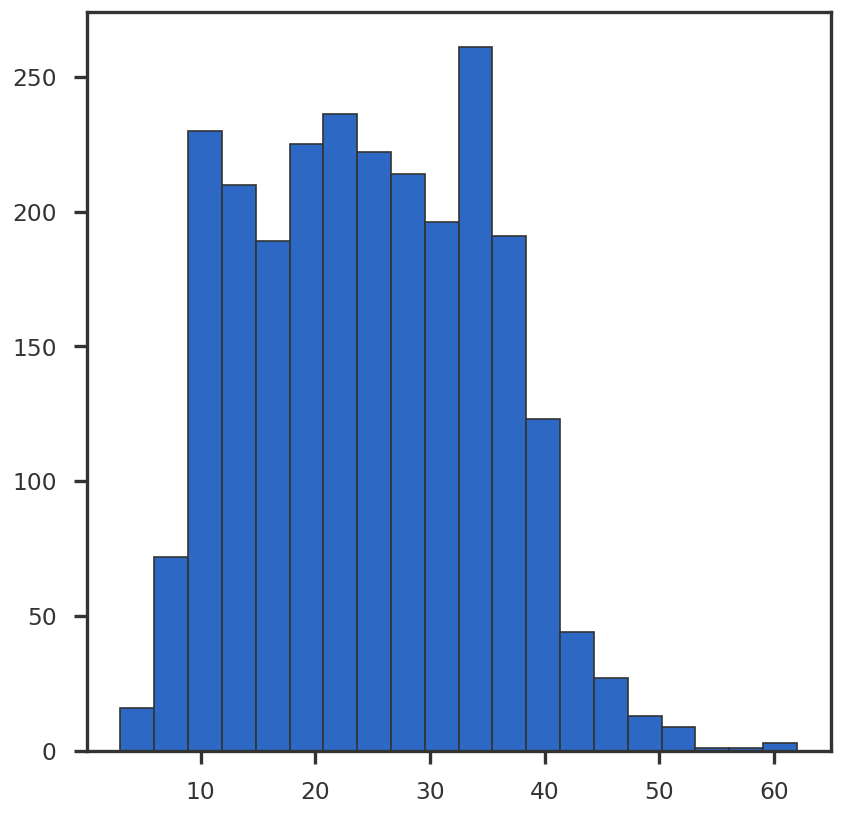

In [9]:
short_desc_char_count = [len(x) for x in short_desc]
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.hist(short_desc_char_count)
plt.show()

# Save modified dataframe

In [10]:
trait_df.to_pickle(os.path.join(data_dir, f"modselect/traits_all_with_desc.pkl"))